# Milestone 2: EDA
Exporing the given datasets for Module D: Covid-19. I used this opportunity to familiarize myself with the given datasets and explore other datasets we could use to supplement the information provided by Dr. Mauricio.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## CCSE Covid-19 Dataset
Firt I looked at the CCSE John Hopkins Dataset, which has datasets that report the cases, deaths, and recoveries of covid-19 cases in different regions of the world. Below are the different datasets that we can use.

In [6]:
df1 = pd.read_csv('data/CCSEGIS_COVID-19/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv')
df1.head()

,Province/States,Country/Region,WHO region,1/21/2020,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020
0,Confirmed,Globally,NaN,282.0,314.0,581.0,846.0,1320.0,2014.0,2798.0,...,413467.0,462684.0,509164.0,571659.0,634813.0,693282.0,750890.0,823626.0,896450.0,972303.0
1,Deaths,Globally,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18433.0,20834.0,23335.0,26493.0,29891.0,33106.0,36405.0,40598.0,45525.0,50321.0
2,Confirmed,China,Western Pacific Region,278.0,309.0,571.0,830.0,1297.0,1985.0,2741.0,...,81848.0,81961.0,82078.0,82230.0,82341.0,82447.0,82545.0,82631.0,82724.0,82802.0
3,Confirmed,Outside of China,NaN,4.0,5.0,10.0,16.0,23.0,29.0,57.0,...,331619.0,380723.0,427086.0,489429.0,552472.0,610835.0,668345.0,740995.0,813726.0,889501.0
4,Deaths,China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,80.0,...,3287.0,3293.0,3298.0,3301.0,3306.0,3310.0,3314.0,3321.0,3327.0,3331.0


The above dataset is a time series of confirmed cases and deaths, based on countries of the world. It also has China's subregions, but no other countrie's subregions. The chinese subregions can be found in the `Province/States` column. We can use this dataset to look at the progression of cases in one country and compare it to the progression of cases in another country, for example, Italy vs. Spain. It doesn't specify what the numbers are for countries other than China (confirmed cases? deaths?). Perhaps this dataset is best for regions of China.

In [43]:
df1['Province/States'].unique()

array(['Confirmed', 'Deaths', 'Hubei ', 'Guangdong', 'Henan', 'Zhejiang',
       'Hunan', 'Anhui', 'Jiangxi', 'Shandong', 'Jiangsu', 'Chongqing',
       'Sichuan', 'Heilongjiang', 'Beijing', 'Shanghai', 'Hebei',
       'Fujian', 'Guangxi', 'Shaanxi', 'Yunnan', 'Hainan', 'Guizhou',
       'Tianjin', 'Shanxi', 'Liaoning', 'Hong Kong', 'Jilin', 'Gansu',
       'Xinjiang', 'Inner Mongolia', 'Ningxia', 'Taiwan', 'Qinghai',
       'Macau', 'Xizang', 'Unspecified*', nan,
       'Case on an international conveyance'], dtype=object)

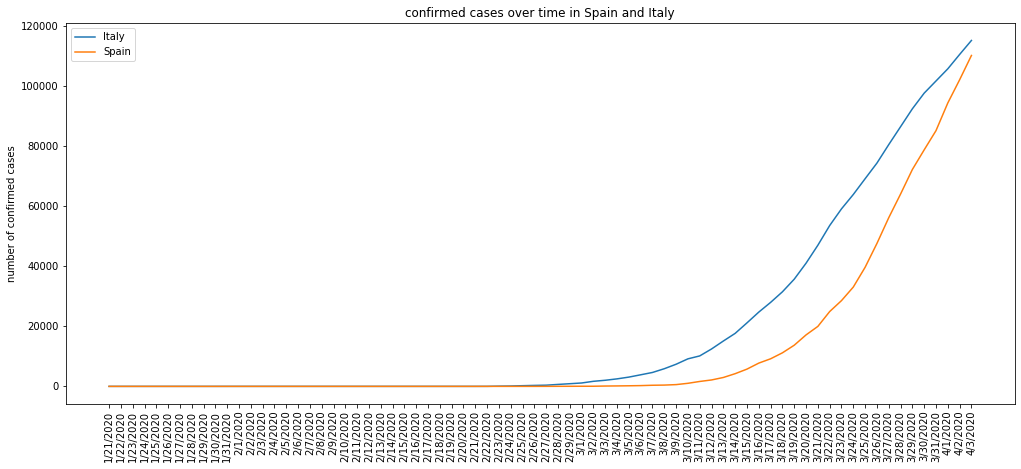

In [45]:
italy_ts = df1[df1['Country/Region'].str.contains('Italy').fillna(False)].iloc[:,3:].fillna(0)
spain_ts = df1[df1['Country/Region'].str.contains('Spain').fillna(False)].iloc[:,3:].fillna(0)

plt.figure(figsize=(17,7))
plt.plot(italy_ts.columns,italy_ts.to_numpy()[0],label='Italy')
plt.plot(spain_ts.columns,spain_ts.to_numpy()[0],label='Spain')
plt.xticks(rotation='vertical'); plt.legend(); 
plt.ylabel('number of confirmed cases');
plt.title('confirmed cases over time in Spain and Italy')
plt.show()

In [7]:
df2 = pd.read_csv('data/CCSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-10-2020.csv')
df2.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-10 22:54:07,34.223334,-82.461707,7,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-10 22:54:07,30.295065,-92.414197,94,4,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-10 22:54:07,37.767072,-75.632346,12,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-10 22:54:07,43.452658,-116.241552,495,6,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-10 22:54:07,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


This dataset looks like it details the current number of cases, deaths, and recoveries in towns in the USA. It also includes all countries and states as a whole (so there is double counting if we blindly look at each column). This is good for comparing the state of different towns, but is only a current snapshot of the data. In order to get a full view, we have to load all the csv files for each date. Data is well documented however, and has geolocations for mapping (see Seth's EDA notebook). This can be very good for mathematically modeling the progression of the virus, especially using sigmoid functions or the SIR model.

In [48]:
df2.tail()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
2937,NaN,NaN,NaN,Western Sahara,2020-04-10 22:53:48,24.215500,-12.885800,4,0,0,4,",,Western Sahara"
2938,NaN,NaN,NaN,Yemen,2020-04-10 22:53:48,15.552727,48.516388,1,0,0,1,Yemen
2939,NaN,NaN,NaN,Zambia,2020-04-10 22:53:48,-13.133897,27.849332,40,2,25,13,Zambia
2940,NaN,NaN,NaN,Zimbabwe,2020-04-10 22:53:48,-19.015438,29.154857,13,3,0,10,Zimbabwe
2941,NaN,unassigned,Utah,US,2020-04-10 22:54:07,NaN,NaN,0,4,0,0,"unassigned, Utah, US"


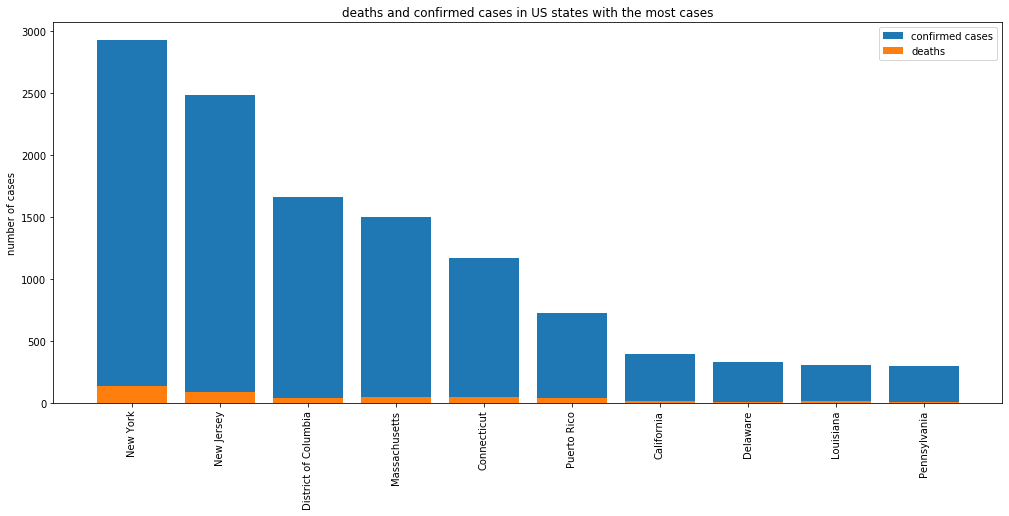

In [90]:
us_highest = df2[df2['Country_Region'] == 'US'].groupby('Province_State').mean().sort_values(['Confirmed'],ascending=False).head(10)

plt.figure(figsize=(17,7))
plt.bar(us_highest.Confirmed.index.to_numpy(),us_highest.Confirmed.to_numpy(),label='confirmed cases')
plt.bar(us_highest.Deaths.index.to_numpy(),us_highest.Deaths.to_numpy(),label='deaths')
plt.xticks(rotation='vertical'); plt.legend(); plt.ylabel('number of cases')
plt.title('deaths and confirmed cases in US states with the most cases')
plt.show()

In [8]:
df3 = pd.read_csv('data/CCSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df3.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,237,273,281,299,349,367,423,444,484,521
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,259,277,304,333,361,377,383,400,409,416
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,847,986,1171,1251,1320,1423,1468,1572,1666,1761
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,390,428,439,466,501,525,545,564,583,601
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,8,8,8,10,14,16,17,19,19,19


In [9]:
df4 = pd.read_csv('data/CCSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
df4.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,3,3,4,4,4,4,4,4,4,4
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,1,1,1,1,1,1,1,1,1,1
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,11,12,15,18,20,21,23,24,33,39
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,0,0,0,0,1,1,1,1,1,1


## MIDAS Covid-19 Dataset


In [51]:
df5 = pd.read_csv('data/midas_COVID-19/data/cases/united states of america/nytimes_covid19_data/20200413_us-states.csv')
df5.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


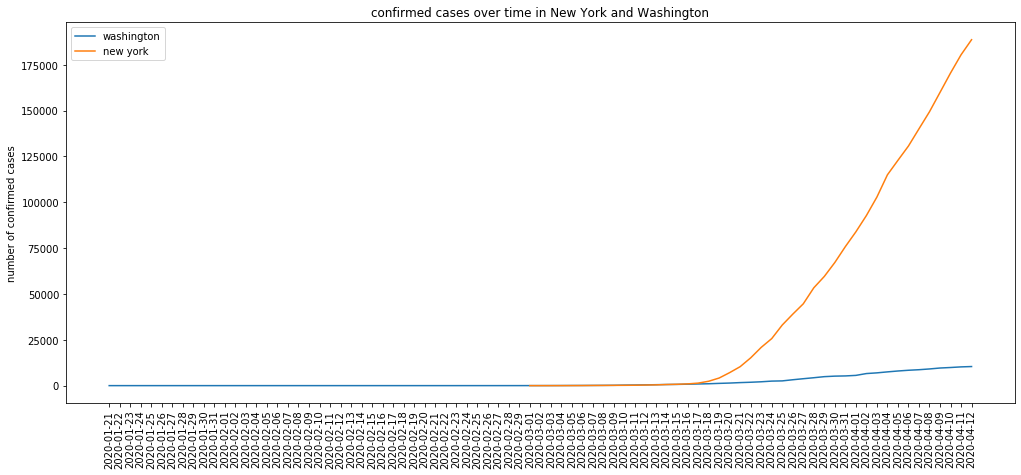

In [60]:
new_york   = df5[df5['state'] == 'New York']
washington = df5[df5['state'] == 'Washington']

plt.figure(figsize=(17,7))
plt.plot(washington.date, washington.cases, label = 'washington')
plt.plot(new_york.date, new_york.cases, label='new york')
plt.xticks(rotation='vertical'); plt.legend(); 
plt.ylabel('number of confirmed cases');
plt.title('confirmed cases over time in New York and Washington')
plt.show()

## Additional Datasets

In [ ]:
df6 = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')
df6.head()